In [ ]:
#In this lab, the key goal is to try and do dimension reduction. To this end, we will use a dataset of our choise and play with dimension reduction techniques. We will focus on text dataset.
#We will follow the example mentioned in this path-breaking paper: http://wordvec.colorado.edu/papers/Landauer_Foltz_Laham_1998.pdf
import string
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from scipy.linalg import svd
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.plotting import scatterplotmatrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#In the command below we are creating our sample dataset that we will use in this lab. This is a text dataset in the raw form.
Sentences = ["Human machine interface for ABC computer applications", "A survey of user opinion of computer system response time", "The EPS user interface management system", "System and human system engineering testing of EPS", "Relation of user perceived response time to error measurement", "The generation of random, binary, ordered trees", "The intersection graph of paths in trees", "Graph minors IV: Widths of trees and well-quasi-ordering", "Graph minors: A survey"]
print(Sentences)

['Human machine interface for ABC computer applications', 'A survey of user opinion of computer system response time', 'The EPS user interface management system', 'System and human system engineering testing of EPS', 'Relation of user perceived response time to error measurement', 'The generation of random, binary, ordered trees', 'The intersection graph of paths in trees', 'Graph minors IV: Widths of trees and well-quasi-ordering', 'Graph minors: A survey']


In [ ]:
#Let's do some pre-processing of the text above that we could later use in our analysis. In the code below we are iterating over each element in the list/array created above.
NewSentences = []
for OneSentence in Sentences:
    #print(OneSentence)
    NewSentences.append(OneSentence)

Sentences = NewSentences[:]
print(Sentences)

['Human machine interface for ABC computer applications', 'A survey of user opinion of computer system response time', 'The EPS user interface management system', 'System and human system engineering testing of EPS', 'Relation of user perceived response time to error measurement', 'The generation of random, binary, ordered trees', 'The intersection graph of paths in trees', 'Graph minors IV: Widths of trees and well-quasi-ordering', 'Graph minors: A survey']


In [ ]:
#Let's lowercase each word in the list above
NewSentences = []
for OneSentence in Sentences:
  OneSentence = OneSentence.lower()
  NewSentences.append(OneSentence)

Sentences = NewSentences[:]
print(Sentences)

['human machine interface for abc computer applications', 'a survey of user opinion of computer system response time', 'the eps user interface management system', 'system and human system engineering testing of eps', 'relation of user perceived response time to error measurement', 'the generation of random, binary, ordered trees', 'the intersection graph of paths in trees', 'graph minors iv: widths of trees and well-quasi-ordering', 'graph minors: a survey']


In [ ]:
#Next step is to remove stop words from text. This helps reduce the dimensions of the matrix that we create.
NewSentences = []
stopwords_dict = {word: 1 for word in stopwords.words("english")}
for OneSentence in Sentences:
  OneSentence = " ".join([word for word in OneSentence.split() if word not in stopwords_dict])
  NewSentences.append(OneSentence)

Sentences = NewSentences[:]
print(Sentences)

['human machine interface abc computer applications', 'survey user opinion computer system response time', 'eps user interface management system', 'system human system engineering testing eps', 'relation user perceived response time error measurement', 'generation random, binary, ordered trees', 'intersection graph paths trees', 'graph minors iv: widths trees well-quasi-ordering', 'graph minors: survey']


In [ ]:
#Now, we remove punctuations from string
NewSentences = []
for word in Sentences:
    for character in word:
        if character in string.punctuation:
            word = word.replace(character,"")
    NewSentences.append(word)

#Sentences = NewSentences[:]
print(Sentences)

['human machine interface abc computer applications', 'survey user opinion computer system response time', 'eps user interface management system', 'system human system engineering testing eps', 'relation user perceived response time error measurement', 'generation random, binary, ordered trees', 'intersection graph paths trees', 'graph minors iv: widths trees well-quasi-ordering', 'graph minors: survey']


In [ ]:
#The code above has a problem. Please look carefully and let me know where the problems are. We must fix the problems before moving ahead. Besides that, how will you ensure that the fixed text is used in your future runs.
NewSentences = []
for word in Sentences:
    for character in word:
        if character in string.punctuation:
            word = re.sub('[^a-zA-Z0-9]+\s*', ' ', word)
    NewSentences.append(word)

Sentences = NewSentences[:]
print(Sentences)

['human machine interface abc computer applications', 'survey user opinion computer system response time', 'eps user interface management system', 'system human system engineering testing eps', 'relation user perceived response time error measurement', 'generation random binary ordered trees', 'intersection graph paths trees', 'graph minors iv widths trees well quasi ordering', 'graph minors survey']


In [ ]:
#A common step in natural language processing is tokenising the string (https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization).
Sentences = [word_tokenize(i) for i in Sentences]
print(Sentences)

[['human', 'machine', 'interface', 'abc', 'computer', 'applications'], ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'management', 'system'], ['system', 'human', 'system', 'engineering', 'testing', 'eps'], ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'], ['generation', 'random', 'binary', 'ordered', 'trees'], ['intersection', 'graph', 'paths', 'trees'], ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'], ['graph', 'minors', 'survey']]


In [ ]:
#Create a term document matrix: https://en.wikipedia.org/wiki/Document-term_matrix
mlb = MultiLabelBinarizer()
TermDocumentMatrix = mlb.fit_transform(Sentences)
print(TermDocumentMatrix)

[[1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [ ]:
#Print the vocabulary: https://en.wikipedia.org/wiki/Vocabulary
print(mlb.classes_)

['abc' 'applications' 'binary' 'computer' 'engineering' 'eps' 'error'
 'generation' 'graph' 'human' 'interface' 'intersection' 'iv' 'machine'
 'management' 'measurement' 'minors' 'opinion' 'ordered' 'ordering'
 'paths' 'perceived' 'quasi' 'random' 'relation' 'response' 'survey'
 'system' 'testing' 'time' 'trees' 'user' 'well' 'widths']


In [ ]:
U, s, VT = svd(TermDocumentMatrix)
#print(U)
print(s)
#print(VT)

[3.39390411 3.14444567 2.67950224 2.22080523 2.21409943 1.966143
 1.7463361  1.6874104  1.34802447]


In [ ]:
#Select only first 2 Eigen values
s = s[0:2]
print(s)

[3.39390411 3.14444567]


In [ ]:
#Now, let's start reducing the dimension of the U and V matrices
#Remember, in matrix multiplication, the first matrix's number of columns must be equal to the number of rows in the second matrix.
#Print the matrix dimensions
print(U.shape)
print(VT.shape)
print(s.shape)
U_small = U[:,0:2]
VT_small = VT[:,0:2]
print(U_small)
print(VT_small)
ReducedU_small = U_small * s
ReducedVT_small = VT_small * s
print(ReducedU_small)
print(ReducedVT_small)

(9, 9)
(34, 34)
(2,)
[[-0.23720321  0.04100838]
 [-0.65417563  0.05146   ]
 [-0.39646486  0.06318633]
 [-0.25838561  0.04477531]
 [-0.52206425  0.07534665]
 [-0.01892814 -0.24769117]
 [-0.03854926 -0.37508469]
 [-0.0848354  -0.83551545]
 [-0.10123697 -0.28960354]]
[[-0.06989096 -0.06989096]
 [ 0.01304153  0.01304153]
 [ 0.21104849  0.21104849]
 [-0.3318486  -0.3318486 ]
 [-0.10769577 -0.10769577]
 [-0.0715408  -0.0715408 ]
 [-0.01453296 -0.01453296]
 [-0.00195058 -0.00195058]
 [-0.03175793 -0.03175793]
 [-0.60732226 -0.05977633]
 [-0.25788921 -0.19428786]
 [-0.0514106   0.01363634]
 [-0.01506563  0.01495888]
 [-0.38689331 -0.16628986]
 [ 0.1290041  -0.027998  ]
 [-0.10339343  0.03150576]
 [ 0.00586189 -0.00236919]
 [-0.08901386  0.32654897]
 [-0.02759119  0.02939417]
 [-0.01506563  0.01495888]
 [-0.0514106   0.01363634]
 [-0.10339343  0.03150576]
 [-0.01506563  0.01495888]
 [-0.02759119  0.02939417]
 [-0.10339343  0.03150576]
 [-0.19240729  0.35805472]
 [-0.06808634  0.3092209 ]
 [-0.1

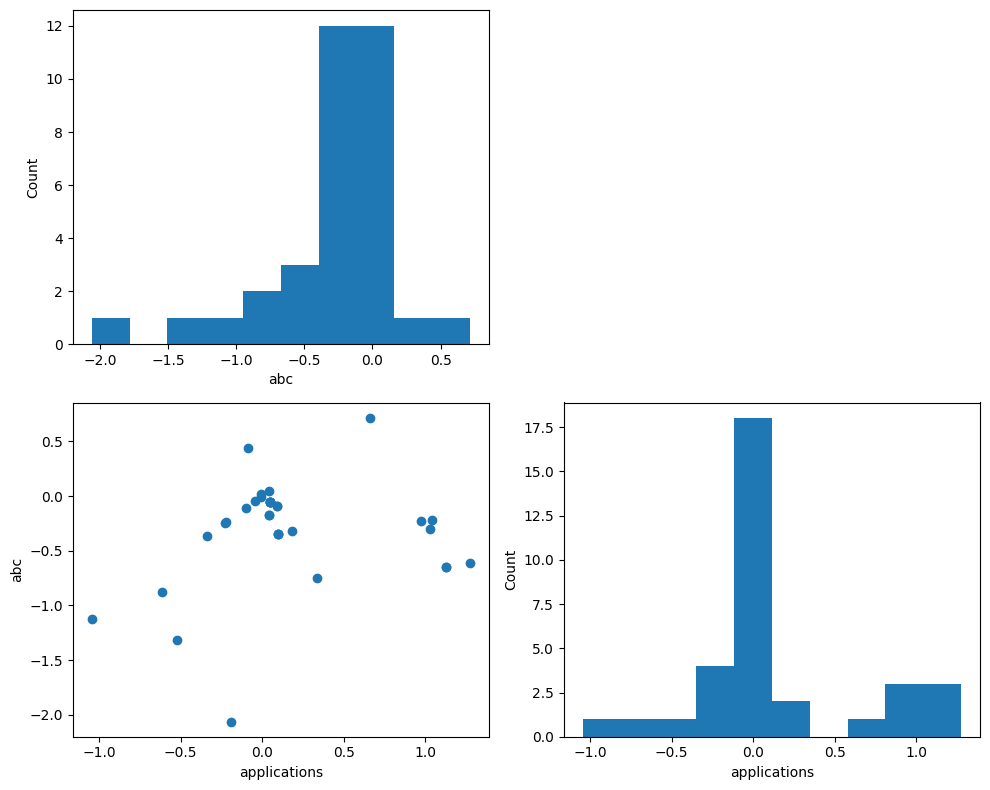

In [ ]:
#Plot matrices
scatterplotmatrix(ReducedVT_small, figsize=(10, 8), names = mlb.classes_)
plt.tight_layout()
plt.show()

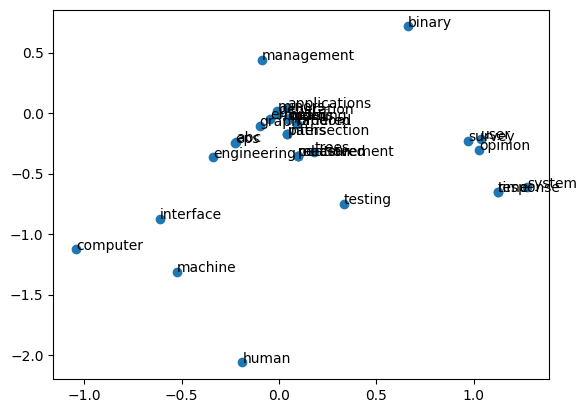

In [ ]:
fig, ax = plt.subplots()
x = ReducedVT_small[:,0]
y = ReducedVT_small[:,1]
n = mlb.classes_
ax.scatter(y,x)
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))